In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [14,10]
import json

In [2]:
%cd /Users/dane/src/fitbit

/Users/dane/src/fitbit


In [7]:
with open('data/dane.json') as fp:
    s = fp.read()
l = json.loads(s)
df = pd.DataFrame.from_dict(l).T
df.head()

,actcal,active1,active2,active3,calories,date,distance,margcal,sedentary,steps,...,biking,cycling_mi,dist_aw,elevation,floors,floors_aw,steps_aw,distance_aw,cycling_aw,calories_aw
2012-11-01,945,478,0,0,2087,2012-11-01,5.22,0,962,10663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-02,1320,601,0,0,2316,2012-11-02,5.43,0,839,11085,...,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-03,1372,508,0,0,2479,2012-11-03,8.46,508,932,17284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-04,1239,548,0,0,2298,2012-11-04,5.41,0,892,11044,...,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-05,0,0,0,0,1976,2012-11-05,4.96,0,1440,10131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.steps.sum()

37082256.0

In [11]:
df.distance.sum()

17986.838249000033

In [14]:
x = df[~df.steps_aw.isna()]

In [15]:
x.head()

,actcal,active1,active2,active3,calories,date,distance,margcal,sedentary,steps,...,biking,cycling_mi,dist_aw,elevation,floors,floors_aw,steps_aw,distance_aw,cycling_aw,calories_aw
2014-01-01,1852,87,172,98,3034,2014-01-01,11.09,1188,1083,22658,...,22.7,22.7,11,0,0,0,22658,NaN,NaN,NaN
2014-01-02,1055,50,80,71,2409,2014-01-02,6.3,690,1239,12866,...,NaN,NaN,6,0,0,0,12866,NaN,NaN,NaN
2014-01-03,1611,67,126,98,2860,2014-01-03,9.91,1077,1149,20246,...,15.9,15.9,10,0,0,0,20246,NaN,NaN,NaN
2014-01-04,1766,71,77,150,3009,2014-01-04,11.08,1218,1142,22623,...,NaN,NaN,11,0,0,0,22623,NaN,NaN,NaN
2014-01-05,1259,66,55,103,2581,2014-01-05,7.59,860,1216,15503,...,20,20,8,0,0,0,15503,NaN,NaN,NaN


In [17]:
df.steps.sum() - df.steps_aw.sum()

452660.0

In [18]:
df['year'] = df.date.apply(lambda x: int(x[:4]))

TypeError: 'float' object is not subscriptable

In [26]:
df['msteps'] = df.apply(lambda row: max(row.steps, row.steps_aw), axis=1)
df['mdist'] = df.apply(lambda row: max(row.distance, row.distance_aw), axis=1)

In [25]:
df.msteps.sum()

40433203.0

In [27]:
df.mdist.sum()

18495.817445

In [31]:
df.loc['2020-04-12']

actcal             NaN
active1            NaN
active2            NaN
active3            NaN
calories           NaN
date               NaN
distance           NaN
margcal            NaN
sedentary          NaN
steps              NaN
weight             NaN
who                NaN
biking             NaN
cycling_mi         NaN
dist_aw            NaN
elevation          NaN
floors             NaN
floors_aw           15
steps_aw         22785
distance_aw      11.06
cycling_aw         NaN
calories_aw    1791.03
msteps             NaN
mdist              NaN
Name: 2020-04-12, dtype: object

In [32]:
with open('data/cindy.json') as fp:
    s = fp.read()
l = json.loads(s)
df = pd.DataFrame.from_dict(l).T
df.head()

,actcal,active1,active2,active3,calories,date,distance,elevation,floors,margcal,sedentary,steps,weight,who
2012-12-15,1110,117,94,61,2224,2012-12-15,8.28,220,22,689,669,17442,153,dane
2012-12-16,1524,185,128,75,2529,2012-12-16,10.94,250,25,922,1052,23434,0,dane
2012-12-17,865,158,89,19,1988,2012-12-17,5.84,20,2,450,1174,12473,153.9,dane
2012-12-18,1129,198,122,22,2178,2012-12-18,6.15,60,6,582,1098,13202,153.5,dane
2012-12-19,918,217,71,16,2003,2012-12-19,5.79,0,0,447,1136,12330,153.4,dane


In [36]:
df.distance.sum()/1e3

22.26924352100004

In [35]:
df.steps.sum()/1e6

47.428738

In [39]:
df['year'] = df.index
df['year'] = df.year.apply(lambda x: int(x[:4]))
df.head()

,actcal,active1,active2,active3,calories,date,distance,elevation,floors,margcal,sedentary,steps,weight,who,year
2012-12-15,1110,117,94,61,2224,2012-12-15,8.28,220,22,689,669,17442,153,dane,2012
2012-12-16,1524,185,128,75,2529,2012-12-16,10.94,250,25,922,1052,23434,0,dane,2012
2012-12-17,865,158,89,19,1988,2012-12-17,5.84,20,2,450,1174,12473,153.9,dane,2012
2012-12-18,1129,198,122,22,2178,2012-12-18,6.15,60,6,582,1098,13202,153.5,dane,2012
2012-12-19,918,217,71,16,2003,2012-12-19,5.79,0,0,447,1136,12330,153.4,dane,2012


In [43]:
by_year = df.groupby('year').steps.aggregate([sum, len])
by_year['average'] = by_year['sum'] / by_year['len']
by_year

,sum,len,average
year,,,
2012,246158.0,17,14479.882353
2013,5044348.0,365,13820.131507
2014,6473463.0,365,17735.515068
2015,6466093.0,365,17715.323288
2016,6955082.0,366,19002.956284
2017,6832614.0,365,18719.490411
2018,6437945.0,365,17638.205479
2019,6345704.0,365,17385.490411
2020,2627331.0,151,17399.543046


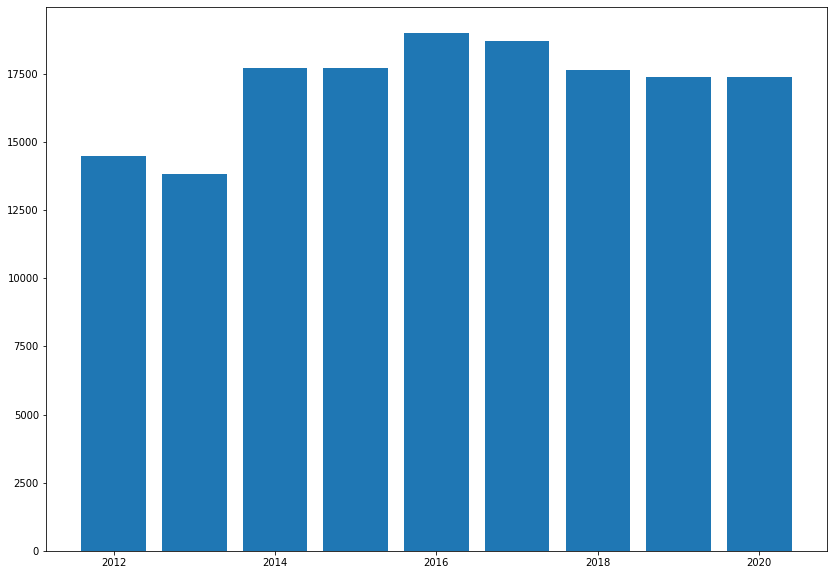

In [53]:
plt.bar(by_year.index, by_year.average);